# Importing libraries

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
import os 
warnings.filterwarnings("ignore")
import datetime

In [214]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [215]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

# Data Processing

### Correlation Matrix

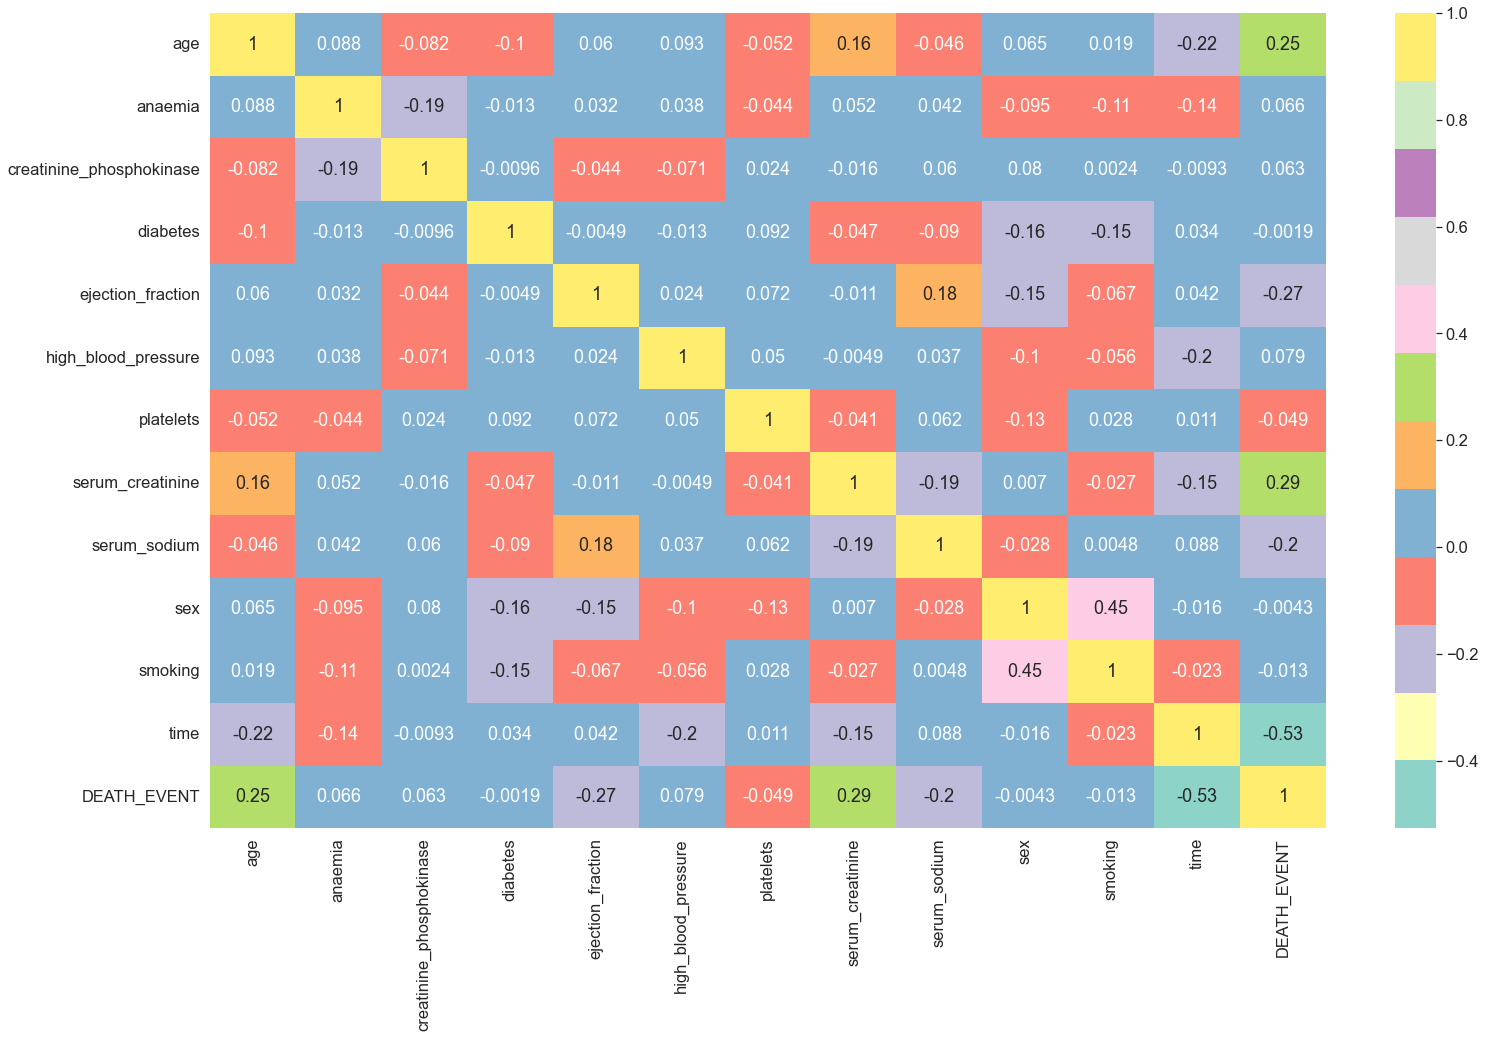

In [216]:
plt.figure(figsize=(25,15))
#Set3: Name of the color palette

cmap = sns.mpl_palette('Set3', 20)
map = sns.heatmap(df.corr(), annot=True, cmap=cmap)

In [217]:
# Function to creat Diagonostic plots

def plotvariable (df, variable):
    plt.figure(figsize=(16,4))
    
    #histogram
    
    plt.subplot(1,2,1)
    plt.hist(df[variable], alpha=0.5)
    
    #boxplot
    
    plt.subplot(1,2,2)
    sns.boxplot(df[variable])
    
    plt.show()


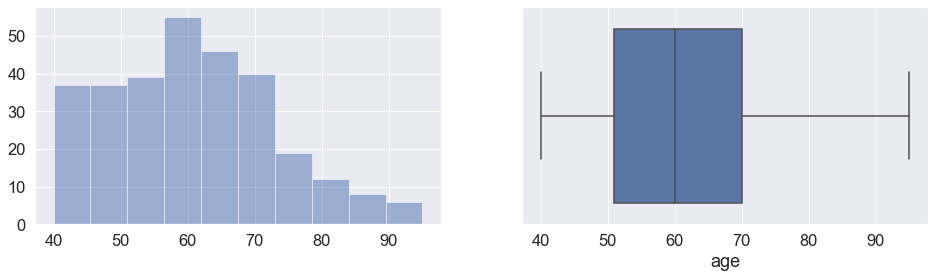

In [218]:
plotvariable(df, "age")

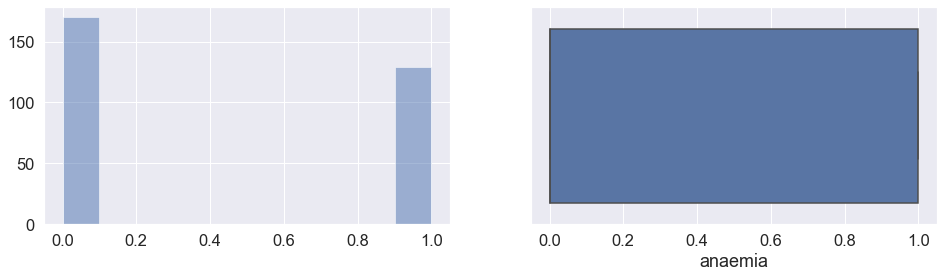

In [219]:
plotvariable(df, "anaemia")

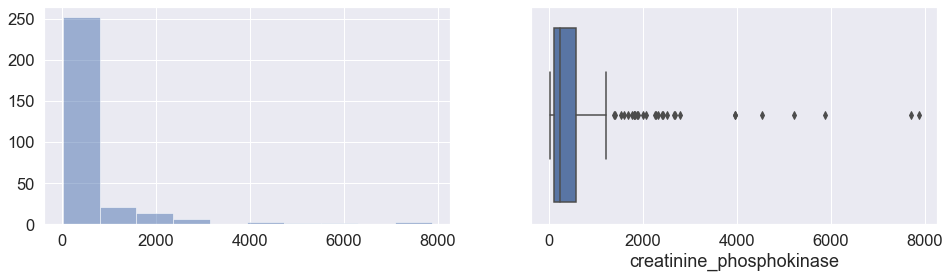

In [220]:
plotvariable(df, "creatinine_phosphokinase")

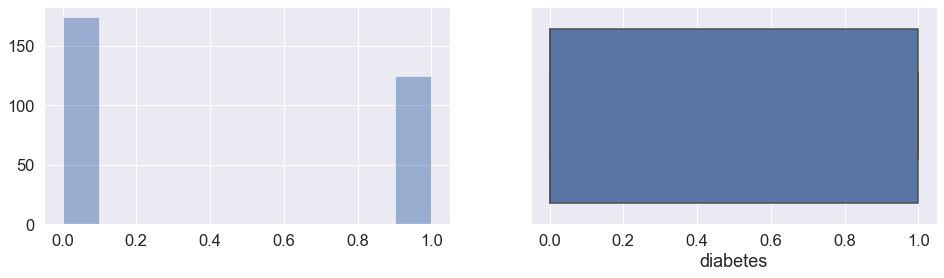

In [221]:
plotvariable(df, "diabetes")

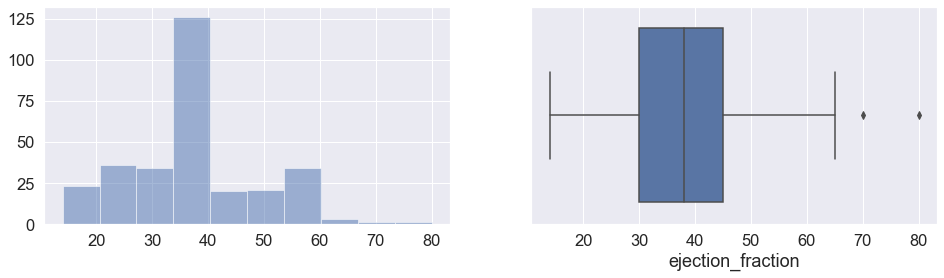

In [222]:
plotvariable(df, "ejection_fraction")

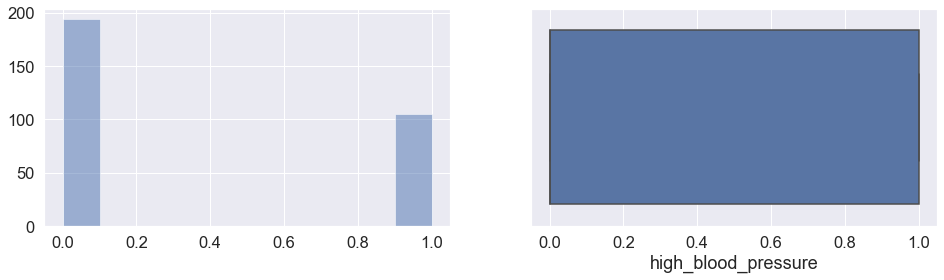

In [223]:
plotvariable(df, "high_blood_pressure")

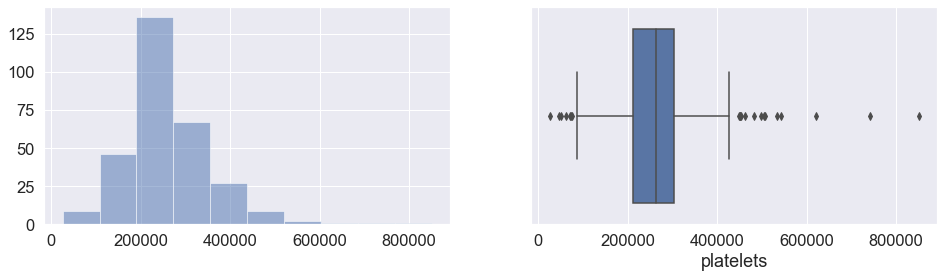

In [224]:
plotvariable(df, "platelets")

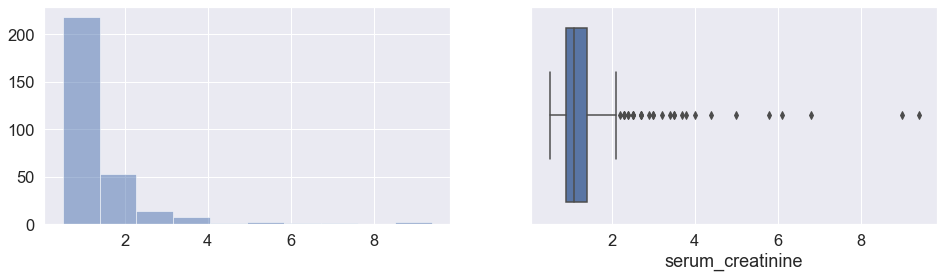

In [225]:
plotvariable(df, "serum_creatinine")

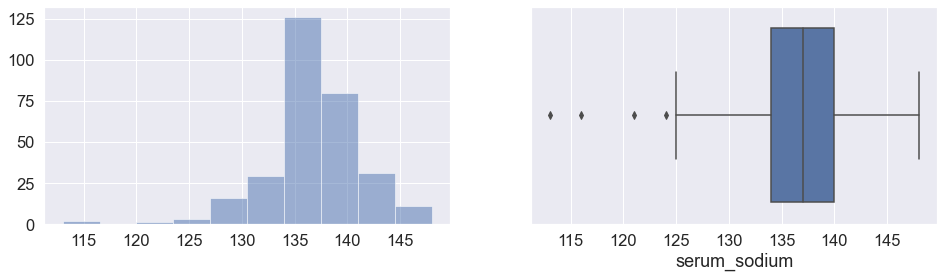

In [226]:
plotvariable(df, "serum_sodium")

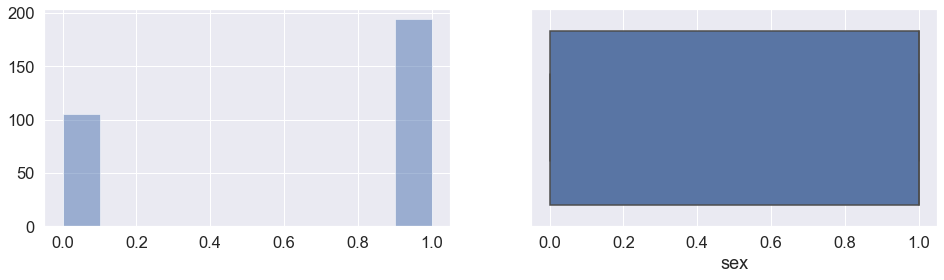

In [227]:
plotvariable(df, "sex")

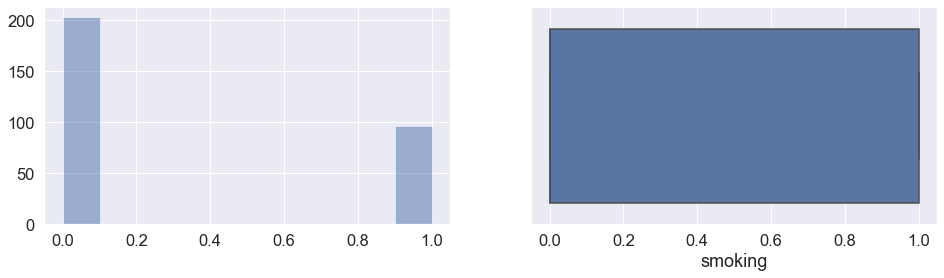

In [228]:
plotvariable(df, "smoking")

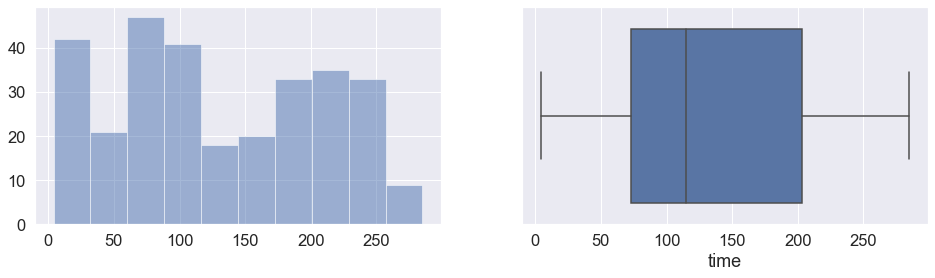

In [229]:
plotvariable(df, "time")

### After searching for outliers we can see there are some outliers in 5 features. "creatinine_phosphokinase","ejection_fraction", "platelets","serum_creatinine","serum_sodium"


In this demo we will follow the IQR approach to filter and deal with outliers. as we know that lower limit for any observation is (Q1- 1.5*IQR) and upper limit is (Q3 + 1.5*IQR)
these terms are as follow:


- Q1 = 25th percentile
- Q3 = 75th percentile
- IQR = Q3- Q1

In [230]:
def find_bounderies(df, variables):
    Q1 = df[variables].quantile(.25)
    Q3 = df[variables].quantile(.75)
    IQR = Q3-Q1
    lower_boundry = Q1 - 1.5*IQR
    upper_boundry = Q3 + 1.5*IQR
    
    return lower_boundry, upper_boundry

### Removing Outliers for "creatinine_phosphokinase"

In [231]:
lower_creatinine_phosphokinase, upper_creatinine_phosphokinase = find_bounderies(df , "creatinine_phosphokinase")
print("upper limit for creatinine_phosphokinase is : " , upper_creatinine_phosphokinase)
print("lower limit for creatinine_phosphokinase is : " , lower_creatinine_phosphokinase)

upper limit for creatinine_phosphokinase is :  1280.25
lower limit for creatinine_phosphokinase is :  -581.75


In [232]:
outliers_creatinine_phosphokinase = np.where(df["creatinine_phosphokinase"] > upper_creatinine_phosphokinase, True,
                              np.where(df["creatinine_phosphokinase"] < lower_creatinine_phosphokinase, True,  False))

In [233]:
outliers_creatinine_phosphokinase

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [234]:
df.shape

(299, 13)

In [235]:
df1 = df.loc[~(outliers_creatinine_phosphokinase)]
df1.shape

(270, 13)

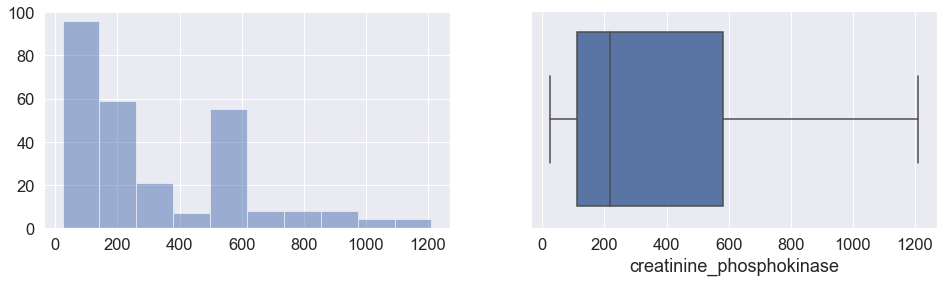

In [236]:
plotvariable(df1, "creatinine_phosphokinase")

### Removing Outliers from "ejection_fraction".

In [237]:
lower_ejection_fraction, upper_ejection_fraction = find_bounderies(df1 , "ejection_fraction")
print("upper limit for ejection_fraction is : " , upper_ejection_fraction)
print("lower limit for ejection_fraction is : " , lower_ejection_fraction)


upper limit for ejection_fraction is :  67.5
lower limit for ejection_fraction is :  7.5


In [238]:
outliers_ejection_fraction = np.where(df1["ejection_fraction"] > upper_ejection_fraction, True,
                              np.where(df1["ejection_fraction"] < lower_ejection_fraction, True,  False))


In [239]:
outliers_ejection_fraction 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [240]:
df1.shape

(270, 13)

In [241]:
df2 = df1.loc[~(outliers_ejection_fraction )]
df2.shape

(268, 13)

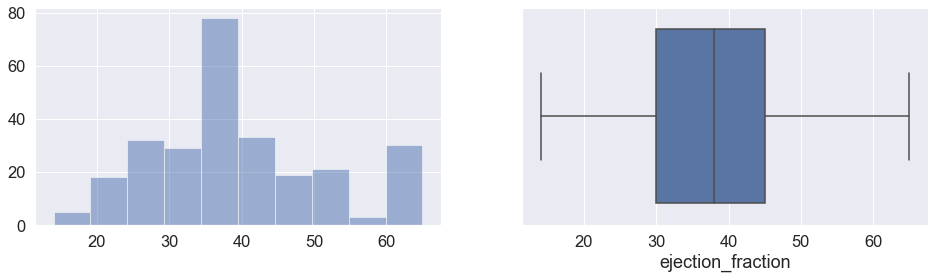

In [242]:
plotvariable(df2, "ejection_fraction")

### Removing Outliers from "platelets".

In [243]:
lower_platelets, upper_platelets = find_bounderies(df2 , "platelets")
print("upper limit for platelets is : " , upper_platelets)
print("lower limit for platelets is : " , lower_platelets)


upper limit for platelets is :  440875.0
lower limit for platelets is :  73875.0


In [244]:
outliers_platelets = np.where(df2["platelets"] > upper_platelets, True,
                              np.where(df2["platelets"] < lower_platelets, True,  False))


In [245]:
outliers_platelets 

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [246]:
df2.shape

(268, 13)

In [247]:
df3 = df2.loc[~(outliers_platelets)]

df3.shape

(250, 13)

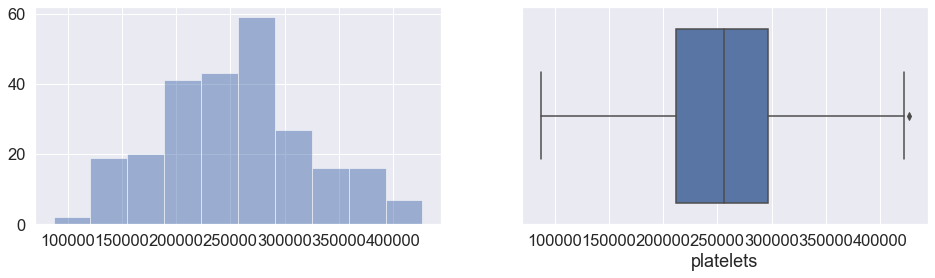

In [248]:
plotvariable(df3, "platelets")

### Removing Outliers from "serum_creatinine"

In [249]:
lower_serum_creatinine, upper_serum_creatinine= find_bounderies(df3 , "serum_creatinine")
print("upper limit for serum_creatinine is : " , upper_serum_creatinine)
print("lower limit for serum_creatinine is : " , lower_serum_creatinine)


upper limit for serum_creatinine is :  2.1499999999999995
lower limit for serum_creatinine is :  0.15000000000000024


In [250]:
outliers_serum_creatinine = np.where(df3["serum_creatinine"] > upper_serum_creatinine, True,
                              np.where(df3["serum_creatinine"] < lower_serum_creatinine, True,  False))


In [251]:
outliers_serum_creatinine

array([False, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [252]:
df3.shape

(250, 13)

In [253]:
df4 = df3.loc[~(outliers_serum_creatinine)]

df4.shape

(227, 13)

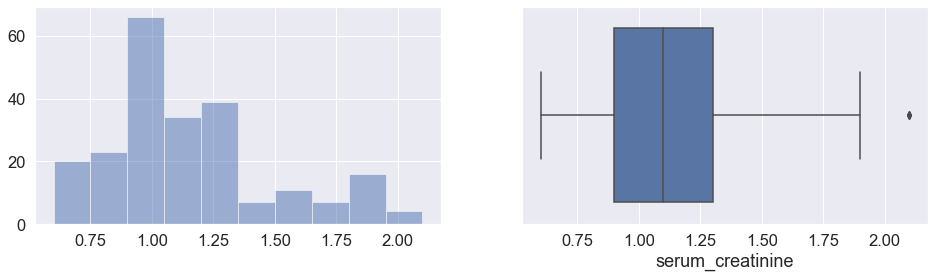

In [254]:
plotvariable(df4, "serum_creatinine")

### Removing Outliers from "serum_creatinine" AGAIN

In [255]:
lower_serum_creatinine, upper_serum_creatinine= find_bounderies(df4 , "serum_creatinine")
print("upper limit for serum_creatinine is : " , upper_serum_creatinine)
print("lower limit for serum_creatinine is : " , lower_serum_creatinine)


upper limit for serum_creatinine is :  1.9000000000000001
lower limit for serum_creatinine is :  0.29999999999999993


In [256]:
outliers_serum_creatinine = np.where(df4["serum_creatinine"] > upper_serum_creatinine, True,
                              np.where(df4["serum_creatinine"] < lower_serum_creatinine, True,  False))


In [257]:
outliers_serum_creatinine

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [258]:
df4.shape

(227, 13)

In [259]:
df5 = df4.loc[~(outliers_serum_creatinine)]

df5.shape


(223, 13)

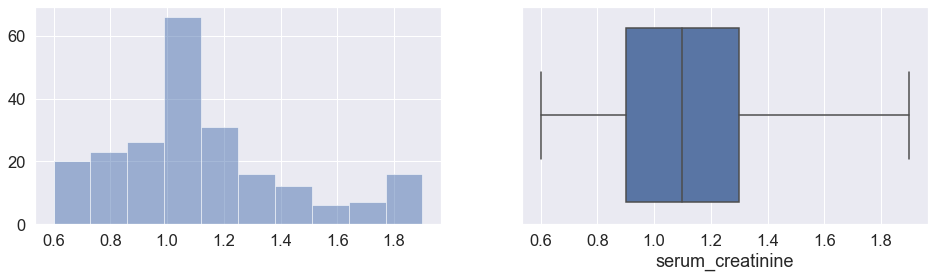

In [260]:
plotvariable(df5, "serum_creatinine")

### Removing Outliers from "serum_sodium"

In [261]:
lower_serum_sodium, upper_serum_sodium = find_bounderies(df5 , "serum_sodium")
print("upper limit for serum_sodium is : " , upper_serum_sodium)
print("lower limit for serum_sodium is : " , lower_serum_sodium)


upper limit for serum_sodium is :  148.25
lower limit for serum_sodium is :  126.25


In [262]:
outliers_serum_sodium= np.where(df5["serum_sodium"] > upper_serum_sodium, True,
                              np.where(df5["serum_sodium"] < lower_serum_sodium, True,  False))


In [263]:
outliers_serum_sodium

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [264]:
df5.shape

(223, 13)

In [265]:
df6 = df5.loc[~(outliers_serum_sodium)]

df6.shape

(219, 13)

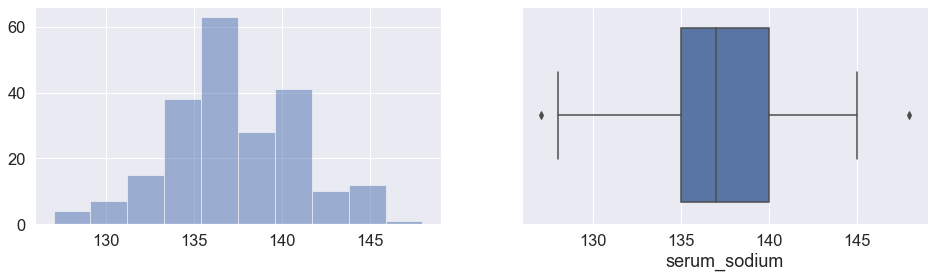

In [266]:
plotvariable(df6, "serum_sodium")

### Removing Outliers from "serum_sodium" AGAIN

In [267]:
lower_serum_sodium, upper_serum_sodium = find_bounderies(df6 , "serum_sodium")
print("upper limit for serum_sodium is : " , upper_serum_sodium)
print("lower limit for serum_sodium is : " , lower_serum_sodium)


upper limit for serum_sodium is :  147.5
lower limit for serum_sodium is :  127.5


In [268]:
outliers_serum_sodium= np.where(df6["serum_sodium"] > upper_serum_sodium, True,
                              np.where(df6["serum_sodium"] < lower_serum_sodium, True,  False))


In [269]:
outliers_serum_sodium

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [270]:
df6.shape

(219, 13)

In [271]:
df7 = df6.loc[~(outliers_serum_sodium)]

df7.shape

(217, 13)

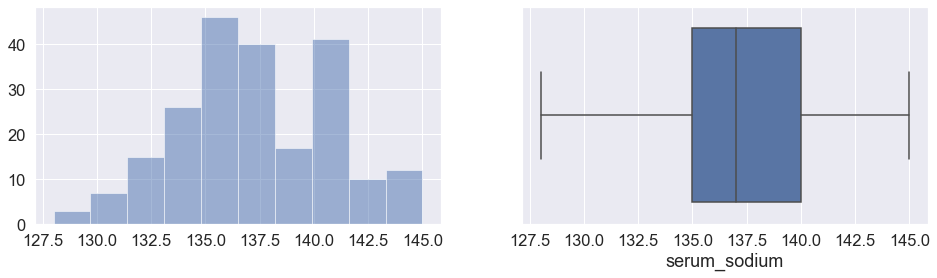

In [272]:
plotvariable(df7, "serum_sodium")

### Feature Selection

In [273]:
features = df7[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']]

### Splitting Data and Scaling the data

In [274]:
X = df7[['age', 'ejection_fraction', 'serum_sodium', 'serum_creatinine']]
y = df7['DEATH_EVENT']

In [275]:
from sklearn.model_selection import train_test_split

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [277]:
from sklearn.preprocessing import StandardScaler

In [278]:
scaler = StandardScaler()

In [279]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Data Models

### LogisticRegression

In [280]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train) 
predictions = reg.predict(x_test)

In [281]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [282]:
predictions.shape

(44,)

In [283]:
y_pred_reg=reg.predict(x_test)

In [284]:
import seaborn as sns
sns.set(font_scale = 1.5)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds,labels=(1,0)),
        annot=True,
        cbar =False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

In [285]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, r2_score

In [286]:
print("Confusion Matrix : \n\n" , confusion_matrix(y_pred_reg,y_test,labels=(1,0)))

Confusion Matrix : 

 [[ 6  2]
 [ 7 29]]


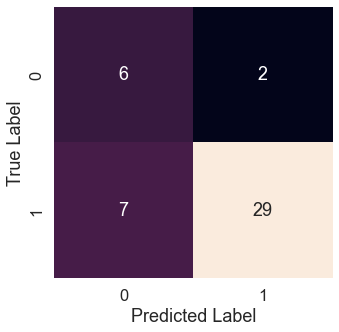

In [287]:
conf_matrix(y_pred_reg,y_test)

In [288]:
print('Precision: ', precision_score(y_test, y_pred_reg))
print('Recall: ', recall_score(y_test, y_pred_reg))
print('f1_score: ', f1_score(y_test, y_pred_reg))
print("Training Score: ", reg.score(x_train, y_train)*100)
reg_acc= accuracy_score(y_test, y_pred_reg)*100
print("Testing Score: ", reg_acc)


Precision:  0.75
Recall:  0.46153846153846156
f1_score:  0.5714285714285714
Training Score:  78.03468208092485
Testing Score:  79.54545454545455


### DecissionTree

In [289]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=1, random_state=1)
dtree.fit(x_train,y_train)
predictions = dtree.predict(x_test)

In [290]:
predictions

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [291]:
predictions.shape

(44,)

In [292]:
y_pred_dtree=dtree.predict(x_test)

In [293]:
print("Confusion Matrix : \n\n" , confusion_matrix(y_pred_dtree,y_test,labels=(1,0)))

Confusion Matrix : 

 [[ 6  5]
 [ 7 26]]


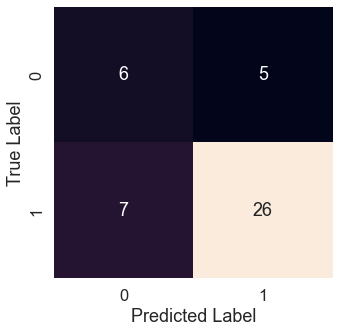

In [294]:
conf_matrix(y_pred_dtree,y_test)

In [295]:
print('Precision: ', precision_score(y_test, y_pred_dtree))
print('Recall: ', recall_score(y_test, y_pred_dtree))
print('f1_score: ', f1_score(y_test, y_pred_dtree))
print("Training Score: ", dtree.score(x_train, y_train)*100)
dtree_acc= accuracy_score(y_test, y_pred_dtree)*100
print("Testing Score: ", dtree_acc)


Precision:  0.5454545454545454
Recall:  0.46153846153846156
f1_score:  0.4999999999999999
Training Score:  78.61271676300578
Testing Score:  72.72727272727273


### Support Vector Machine

In [296]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)

In [297]:
predictions


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [298]:
predictions.shape

(44,)

In [299]:
print("Confusion Matrix : \n\n" , confusion_matrix(predictions,y_test,labels=(1,0)))

Confusion Matrix : 

 [[ 4  2]
 [ 9 29]]


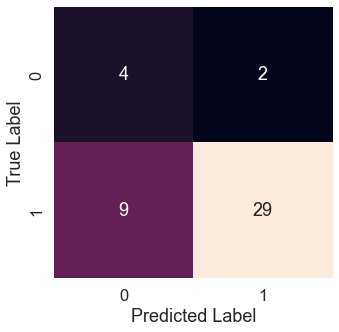

In [300]:
conf_matrix(predictions,y_test)

In [301]:
from sklearn.metrics import classification_report

In [302]:
print("Classification Report : \n\n" , classification_report(predictions,y_test),"\n")

Classification Report : 

               precision    recall  f1-score   support

           0       0.94      0.76      0.84        38
           1       0.31      0.67      0.42         6

    accuracy                           0.75        44
   macro avg       0.62      0.71      0.63        44
weighted avg       0.85      0.75      0.78        44
 



### Random Forest

In [303]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)

In [304]:
predictions

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1],
      dtype=int64)

In [305]:
predictions.shape

(44,)

In [306]:
y_pred_rfc=rfc.predict(x_test)

In [307]:
print("Confusion Matrix : \n\n" , confusion_matrix(y_pred_rfc,y_test,labels=(1,0)))

Confusion Matrix : 

 [[ 8  2]
 [ 5 29]]


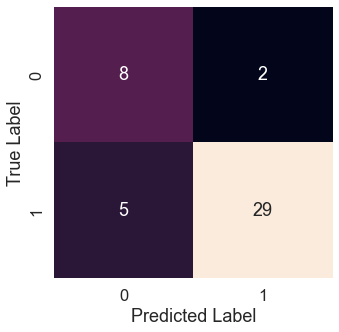

In [308]:
conf_matrix(y_pred_rfc,y_test)

In [309]:
print('Precision: ', precision_score(y_test, y_pred_rfc))
print('Recall: ', recall_score(y_test, y_pred_rfc))
print('f1_score: ', f1_score(y_test, y_pred_rfc))
print("Training Score: ", rfc.score(x_train, y_train)*100)
rfc_acc= accuracy_score(y_test, y_pred_rfc)*100
print("Testing Score: ", rfc_acc)

Precision:  0.8
Recall:  0.6153846153846154
f1_score:  0.6956521739130435
Training Score:  100.0
Testing Score:  84.0909090909091


In [310]:
print("Classification Report : \n\n" , classification_report(predictions,y_test),"\n")

Classification Report : 

               precision    recall  f1-score   support

           0       0.94      0.85      0.89        34
           1       0.62      0.80      0.70        10

    accuracy                           0.84        44
   macro avg       0.78      0.83      0.79        44
weighted avg       0.86      0.84      0.85        44
 



# Model Performance

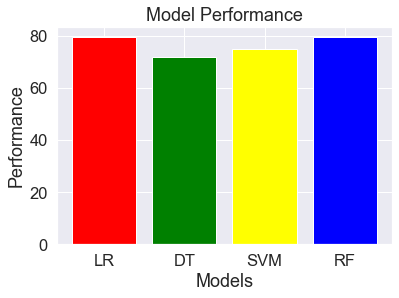

In [311]:
x = ["LR","DT","SVM","RF"]
h = [79.54, 72, 75, 79.54]
c = ["red", "green", "yellow", "blue"]
plt.bar(x,h,0.8,color=c)
plt.xlabel("Models")
plt.ylabel("Performance")
plt.title("Model Performance")
plt.show()

# Forwading

In [312]:
import pickle

In [313]:
pickle.dump(rfc, open('model.pkl', 'wb'))

In [314]:
model = pickle.load(open('model.pkl', 'rb'))
print(model)

RandomForestClassifier()
